In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hechos = pd.read_parquet('../archivos/datos_limpios/hechos.parquet')
victimas = pd.read_parquet('../archivos/datos_limpios/victimas.parquet')

In [10]:
hechos.describe(include='all')

,Id,N_victimas,Año,Mes,Dia,Hora,Tipo_de_calle,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
count,695,695.000000,695.000000,695.000000,695.000000,694.000000,695,695,695,695.000000,695,695,686,673
unique,695,NaN,NaN,NaN,NaN,NaN,4,278,318,NaN,605,605,9,9
top,2021-0097,NaN,NaN,NaN,NaN,NaN,AVENIDA,"PAZ, GRAL. AV.",,NaN,.,.,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,429,57,170,NaN,11,11,295,204
mean,NaN,1.030216,2018.191367,6.686331,15.933813,11.645533,NaN,NaN,NaN,7.435971,NaN,NaN,NaN,NaN
std,NaN,0.179519,1.682915,3.570133,8.645513,6.697418,NaN,NaN,NaN,4.381139,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017.000000,4.000000,9.000000,6.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018.000000,7.000000,16.000000,11.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020.000000,10.000000,23.000000,17.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


**Verifico que los valores N_victimas sean del tipo int para poder realizar una suma por cada año**

In [11]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             695 non-null    object 
 1   N_victimas     695 non-null    int64  
 2   Año            695 non-null    int64  
 3   Mes            695 non-null    int64  
 4   Dia            695 non-null    int64  
 5   Hora           694 non-null    float64
 6   Tipo_de_calle  695 non-null    object 
 7   Calle          695 non-null    object 
 8   Cruce          695 non-null    object 
 9   Comuna         695 non-null    int64  
 10  Longitud       695 non-null    object 
 11  Latitud        695 non-null    object 
 12  Victima        686 non-null    object 
 13  Acusado        673 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 81.4+ KB


quiero ir verificando por diferentes franjas de tiempo: anual, mensual y diario

In [12]:
muertes_por_año = hechos[['N_victimas','Año']]
muertes_por_año = muertes_por_año.groupby('Año').sum().reset_index()
muertes_por_año.head()

,Año,N_victimas
0,2016,145
1,2017,140
2,2018,149
3,2019,104
4,2020,81


+ Grafico la cantidad de muertes por año, chequeo si en 2019 y 2020 hay un descenso, debido al covid y las restricciones de circulacion

/tmp/ipykernel_32390/2543124608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Año', y='N_victimas', data=muertes_por_año, palette='magma')


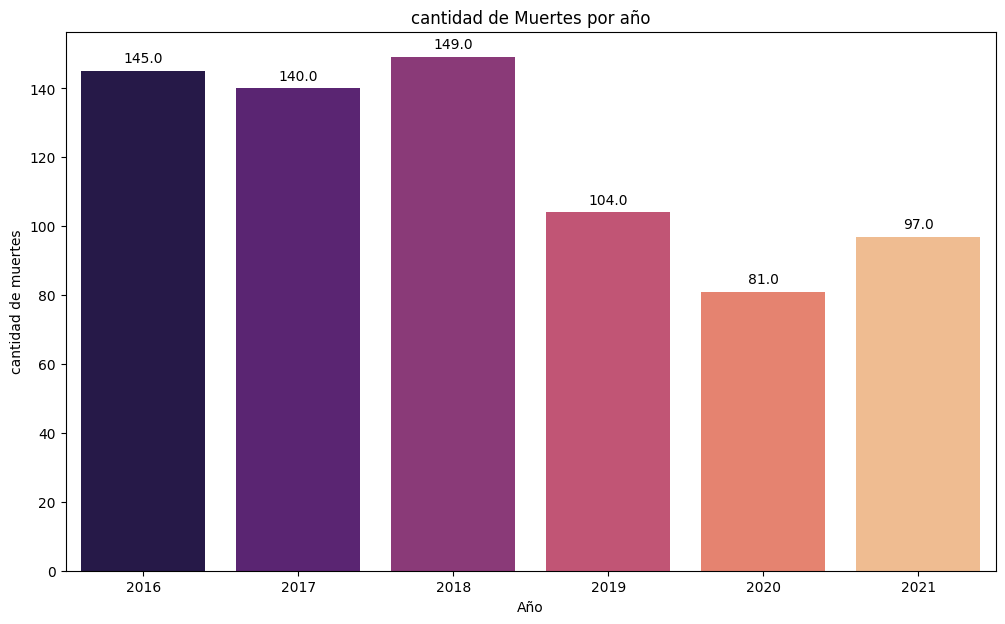

In [13]:
plt.figure(figsize=(12, 7))
plt.title('cantidad de Muertes por año')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Año', y='N_victimas', data=muertes_por_año, palette='magma')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [14]:
muertes_por_mes = hechos[['N_victimas','Año','Mes']]
muertes_por_mes = muertes_por_mes.groupby(['Año','Mes']).sum().reset_index()
muertes_por_mes

,Año,Mes,N_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [17]:
unicos = hechos['Año'].unique()
unicos[1]

2017

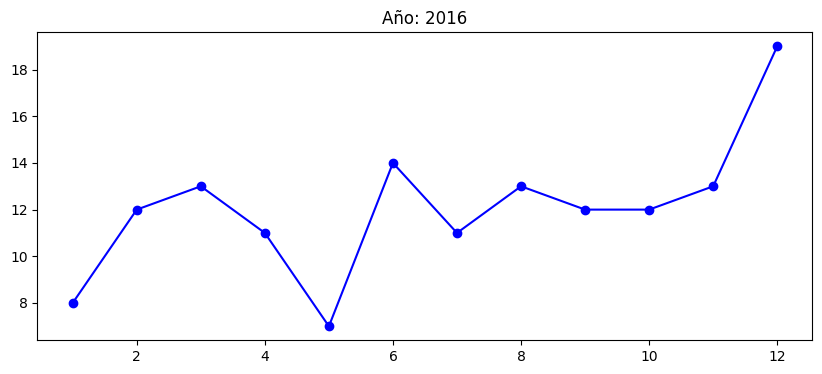

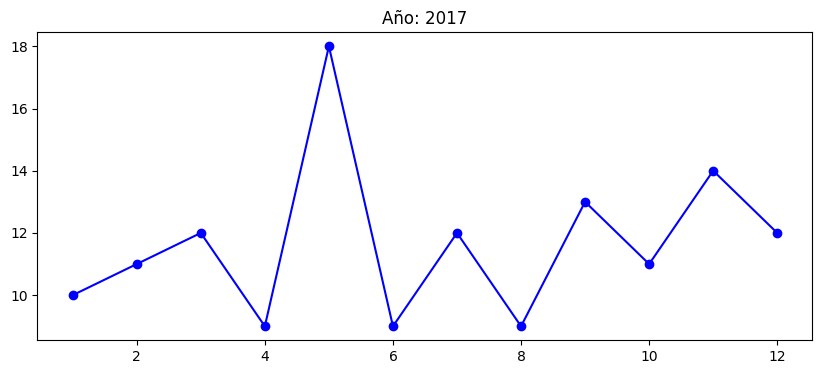

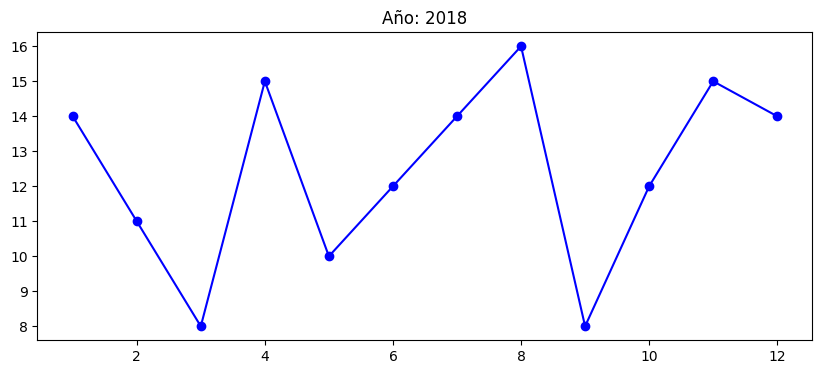

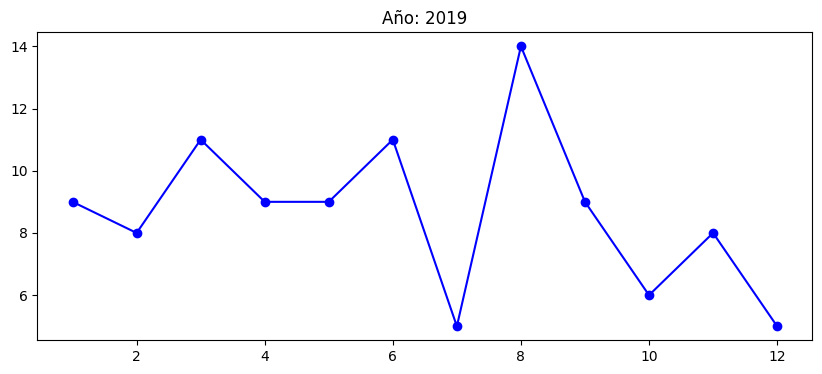

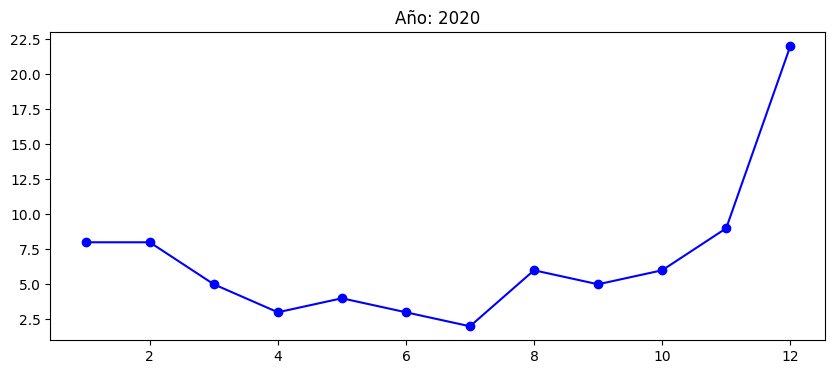

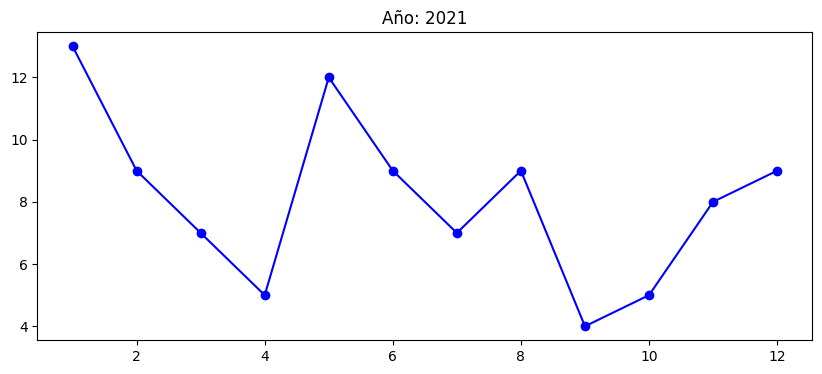

In [53]:
for anio in unicos:
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.title(f"Año: {anio}")
    datos = muertes_por_mes[muertes_por_mes['Año']==anio]
    ax.plot(datos["Mes"], datos["N_victimas"], label="2016", marker='o', color='blue')
    plt.show